### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [149]:
data = pd.read_csv('data/coupons.csv')

In [150]:
data.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [151]:
# Running info and describe to get insights on data shape, data types and some basic statistical info
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


Data set is mostly in good shape.

There are few nulls in the columns about the frequency of going to a bar, restaurants (<20 and 20-50), Coffee House and Carry Away, which based on distribution we can adjust to mean or median.

Regarding the column 'Car', which is not included in the data description, and being mostly null (only 128 non-null values out of 12684), I will ingnore it.

In [170]:
# Replaced ranges values by top value in range, to convert columns content in numeric to allow for better sorting and presentation in tables. After that change, we would read the ranges as "up to X", with the last value being understood as "more than Y".
# E.g., for "age":
# Less than 21 -> 21
# 21-25 -> 25
# 26-30 -> 30
# etc.

# Same for ranges in the frequency of bars, coffee houses, etc.:
# Never -> 0
# Less than 1 -> 1
# 1 to 3 -> 3
# 4 to 8 -> 8
# More than 8 -> 9

data2 = data.copy()

data2['age'].unique()

# With the unique values in the 'age' column we see it is using the lower end of the range, e.g., 21 being the lower end of the 21-26 range).
# With the proposed change, 21 will be replaced with 25, etc.

data2.loc[data2.age == 'below21', 'age'] = 21
data2.loc[data2.age == '21', 'age'] = 25
data2.loc[data2.age == '26', 'age'] = 30
data2.loc[data2.age == '31', 'age'] = 35
data2.loc[data2.age == '36', 'age'] = 30
data2.loc[data2.age == '41', 'age'] = 45
data2.loc[data2.age == '46', 'age'] = 50
data2.loc[data2.age == '50plus', 'age'] = 51

# Re-checking the replacement has been successful:

data2['age'].unique()

# Proceed with the same approach for Bar, Coffee House, etc.

data2['Bar'].unique()

data2.loc[data2.Bar == 'never', 'Bar'] = 0
data2.loc[data2.Bar == 'less1', 'Bar'] = 1
data2.loc[data2.Bar == '1~3', 'Bar'] = 3
data2.loc[data2.Bar == '4~8', 'Bar'] = 8
data2.loc[data2.Bar == 'gt8', 'Bar'] = 9

data2['Bar'].unique()

data2['CoffeeHouse'].unique()

data2.loc[data2.CoffeeHouse == 'never', 'CoffeeHouse'] = 0
data2.loc[data2.CoffeeHouse == 'less1', 'CoffeeHouse'] = 1
data2.loc[data2.CoffeeHouse == '1~3', 'CoffeeHouse'] = 3
data2.loc[data2.CoffeeHouse == '4~8', 'CoffeeHouse'] = 8
data2.loc[data2.CoffeeHouse == 'gt8', 'CoffeeHouse'] = 9

data2['CoffeeHouse'].unique()

data2['CarryAway'].unique()

data2.loc[data2.CarryAway == 'never', 'CarryAway'] = 0
data2.loc[data2.CarryAway == 'less1', 'CarryAway'] = 1
data2.loc[data2.CarryAway == '1~3', 'CarryAway'] = 3
data2.loc[data2.CarryAway == '4~8', 'CarryAway'] = 8
data2.loc[data2.CarryAway == 'gt8', 'CarryAway'] = 9

data2['CarryAway'].unique()

data2['RestaurantLessThan20'].unique()

data2.loc[data2.RestaurantLessThan20 == 'never', 'RestaurantLessThan20'] = 0
data2.loc[data2.RestaurantLessThan20 == 'less1', 'RestaurantLessThan20'] = 1
data2.loc[data2.RestaurantLessThan20 == '1~3', 'RestaurantLessThan20'] = 3
data2.loc[data2.RestaurantLessThan20 == '4~8', 'RestaurantLessThan20'] = 8
data2.loc[data2.RestaurantLessThan20 == 'gt8', 'RestaurantLessThan20'] = 9

data2['RestaurantLessThan20'].unique()

data2['Restaurant20To50'].unique()

data2.loc[data2.Restaurant20To50 == 'never', 'Restaurant20To50'] = 0
data2.loc[data2.Restaurant20To50 == 'less1', 'Restaurant20To50'] = 1
data2.loc[data2.Restaurant20To50 == '1~3', 'Restaurant20To50'] = 3
data2.loc[data2.Restaurant20To50 == '4~8', 'Restaurant20To50'] = 8
data2.loc[data2.Restaurant20To50 == 'gt8', 'Restaurant20To50'] = 9

data2['Restaurant20To50'].unique()

data2.loc[data2.income == 'Less than $12500', 'income'] = 12500
data2.loc[data2.income == '$12500 - $24999', 'income'] = 24999
data2.loc[data2.income == '$25000 - $37499', 'income'] = 37499
data2.loc[data2.income == '$37500 - $49999', 'income'] = 49999
data2.loc[data2.income == '$50000 - $62499', 'income'] = 62499
data2.loc[data2.income == '$62500 - $74999', 'income'] = 74999
data2.loc[data2.income == '$75000 - $87499', 'income'] = 87499
data2.loc[data2.income == '$87500 - $99999', 'income'] = 99999
data2.loc[data2.income == '$100000 or More', 'income'] = 100000

3. Decide what to do about your missing data -- drop, replace, other...

In [171]:
# Review how many records have null values in any of the target columns

nullData = data2[data2['Bar'].isnull() | data2['CoffeeHouse'].isnull() | data2['CarryAway'].isnull() | data2['RestaurantLessThan20'].isnull() | data2['Restaurant20To50'].isnull()]
nullData.shape

(605, 26)

With <5% of data having any of the target columns with nan values, I decide to drop those records

In [172]:
cleanDF = data2[data2['Bar'].notnull() & data2['CoffeeHouse'].notnull() & data2['CarryAway'].notnull() & data2['RestaurantLessThan20'].notnull() & data2['Restaurant20To50'].notnull()]
cleanDF.shape

(12079, 26)

4. What proportion of the total observations chose to accept the coupon?



In [139]:
# From now on, we'll consider as total observation those in cleanDF

cleanDF.query('Y==1')['Y'].count()/cleanDF['Y'].count()*100

56.93352098683666

56.93% of the total observation (cleanDF) accepted the coupon

5. Use a bar plot to visualize the `coupon` column.

<ipython-input-140-3927fcd32412>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  myplot.set_xticklabels(myplot.get_xticklabels(),rotation=45)


[Text(0, 0, 'Restaurant(<20)'),
 Text(1, 0, 'Coffee House'),
 Text(2, 0, 'Bar'),
 Text(3, 0, 'Carry out & Take away'),
 Text(4, 0, 'Restaurant(20-50)')]

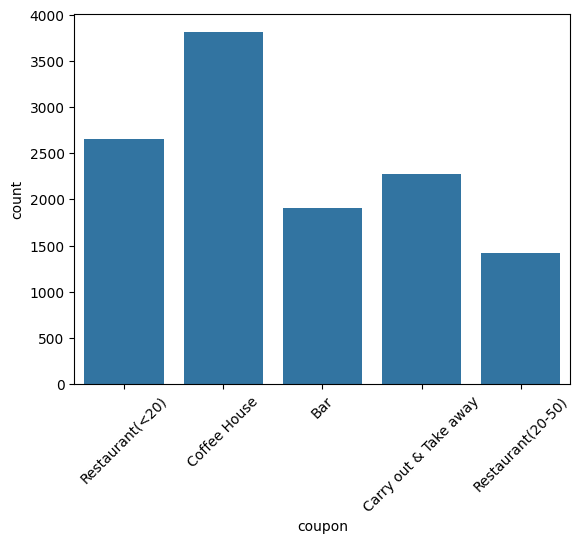

In [140]:
myplot = sns.countplot(cleanDF, x='coupon')
myplot.set_xticklabels(myplot.get_xticklabels(),rotation=45)

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

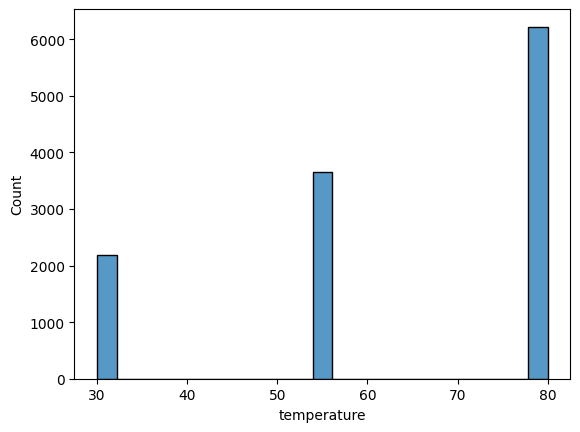

In [141]:
sns.histplot(cleanDF, x='temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [155]:
df1 = cleanDF[cleanDF['coupon']=='Bar']
df1.shape


(1913, 26)

2. What proportion of bar coupons were accepted?


41.19184526921067

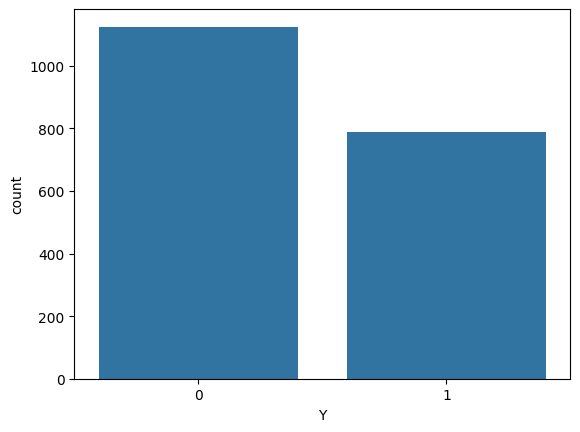

In [156]:
sns.countplot(df1, x='Y')
len(df1.query('Y==1').index)/1913*100


41.19% of Bar coupons were accepted out of the 1913 total Bar coupons

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


<Axes: xlabel='Bar', ylabel='count'>

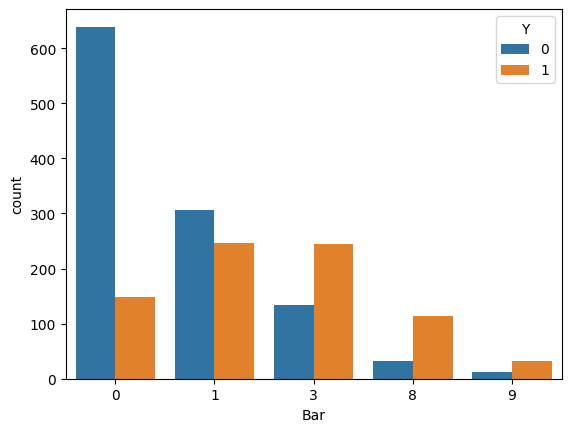

In [144]:
sns.countplot(df1, x='Bar', hue='Y')

Based on the above chart, we can see the pattern of increasing acceptance as the number of times the user goes to a bar increases.

We can see that the "hinge" value, where we can see the change in the trend from majority of rejections (Y=0) to majority of acceptances (Y=1) is 3. As items with x=3 are those originally recorded as 1~3, we could assume that the acceptance of the coupons will continue the trend in this range, with more acceptances the greter the frequency of going to a Bar (Y(x=1)<Y(x=3)).

It could be assessed, then, that those who went to a bar 3 or more times a month, generall accept the coupons most of the time, as opposed to those that went to the bar less than 3 times per month.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


<Axes: xlabel='age', ylabel='count'>

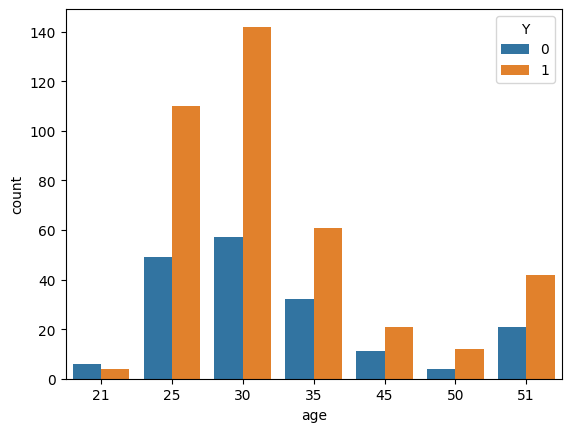

In [157]:
# Select target group: Bar>1 (1 = Less than 1, as per transformations in ealier steps in the notebook)

df4 = df1.query('Bar>1')
sns.countplot(df4, x='age', hue='Y')

Based on the above result, the acceptance over the age of 21 is more or less homogeneous and consistent. Assuming this data is from the US, where legal age for drinking is 21, this could be seen as an expected result.

With the transformations applied on the age column in earlier steps in the notebook, the group >25 years old correspond to values in [30, 35, 45, 50 and 51], with 30 being those ]25,30], and 51 those ]50,inf[.

Behavior of +25 and 21-25 group is the same, with about 66% acceptance rate. The only group of people who go to a bar more than 1 a month with a different acceptance rate is for those up to 21 years old.



5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


<Axes: xlabel='age', ylabel='count'>

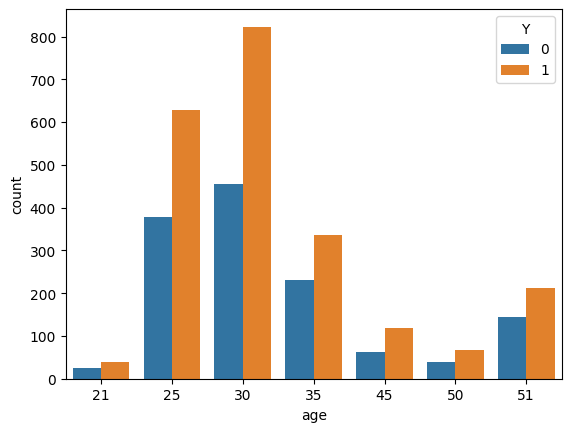

In [163]:
df5 = cleanDF.query('Bar>1 and passanger!="Kid(s)" and occupation!="Farming Fishing & Forestry"')
sns.countplot(df5,x='age', hue='Y')

Comparing against "Age", and excluding the <21 year-old-group, there aren't any significant difference compared to previous analysis.

<ipython-input-184-861b61767979>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  myplot5.set_xticklabels(myplot5.get_xticklabels(),rotation=90)


[Text(0, 0, 'Student'),
 Text(1, 0, 'Healthcare Support'),
 Text(2, 0, 'Management'),
 Text(3, 0, 'Unemployed'),
 Text(4, 0, 'Sales & Related'),
 Text(5, 0, 'Office & Administrative Support'),
 Text(6, 0, 'Construction & Extraction'),
 Text(7, 0, 'Legal'),
 Text(8, 0, 'Life Physical Social Science'),
 Text(9, 0, 'Retired'),
 Text(10, 0, 'Computer & Mathematical'),
 Text(11, 0, 'Healthcare Practitioners & Technical'),
 Text(12, 0, 'Personal Care & Service'),
 Text(13, 0, 'Architecture & Engineering'),
 Text(14, 0, 'Arts Design Entertainment Sports & Media'),
 Text(15, 0, 'Protective Service'),
 Text(16, 0, 'Business & Financial'),
 Text(17, 0, 'Food Preparation & Serving Related'),
 Text(18, 0, 'Installation Maintenance & Repair'),
 Text(19, 0, 'Education&Training&Library'),
 Text(20, 0, 'Community & Social Services'),
 Text(21, 0, 'Production Occupations'),
 Text(22, 0, 'Transportation & Material Moving'),
 Text(23, 0, 'Building & Grounds Cleaning & Maintenance')]

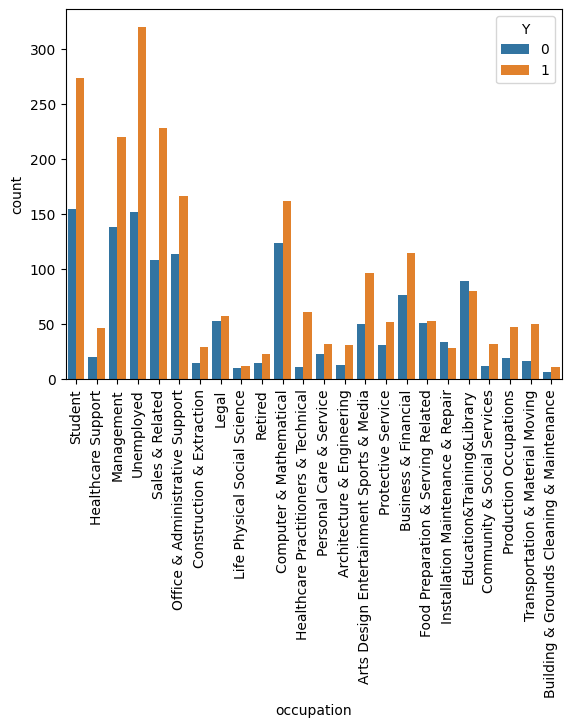

In [184]:
myplot5 = sns.countplot(df5,x='occupation', hue='Y')
myplot5.set_xticklabels(myplot5.get_xticklabels(),rotation=90)

When it comes to analysis by occupation, the acceptance ratio (acccepted/rejected) in the majority of occupations is significantly greater than 1, with the exception of
- Legal, Life Physical Social Science, Food Preparation & Serving related, in which the ratio is ~1
- Installation Maintenance & Repair, and Education&TRaining&Library, in which it is <1

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



<Axes: xlabel='age', ylabel='count'>

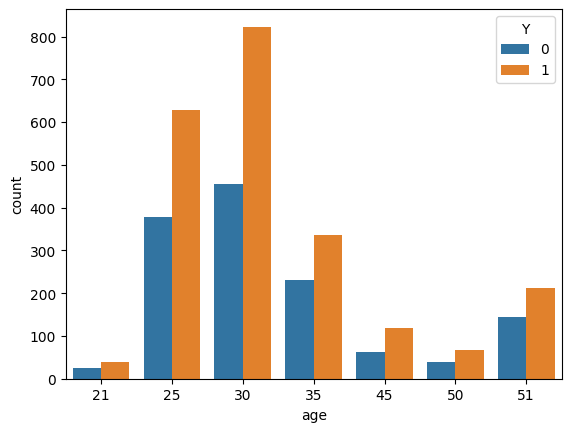

In [175]:

df6 = cleanDF.query('(Bar>1 and passanger!="Kid(s)" and maritalStatus!="Widow") or (Bar>1 and age<35) or (RestaurantLessThan20>3 and income<50000)')
sns.countplot(df5,x='age', hue='Y')


<Axes: xlabel='passanger', ylabel='count'>

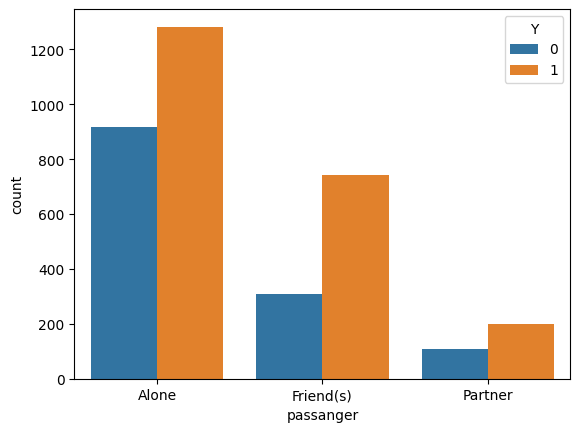

In [180]:
sns.countplot(df5,x='passanger', hue='Y')

<Axes: xlabel='occupation', ylabel='count'>

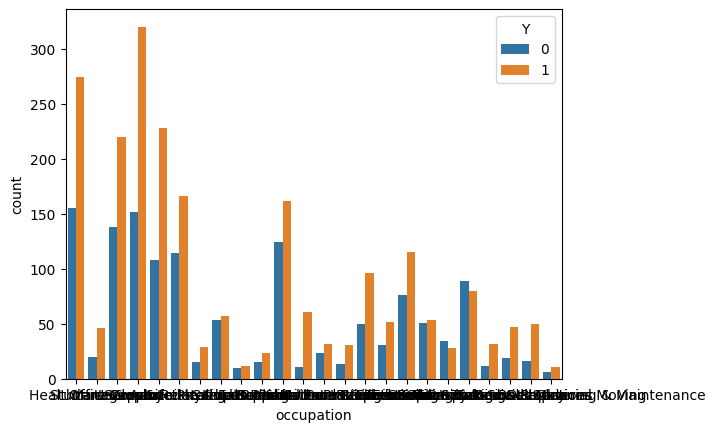

In [182]:
sns.countplot(df5,x='occupation', hue='Y')

<Axes: xlabel='Bar', ylabel='count'>

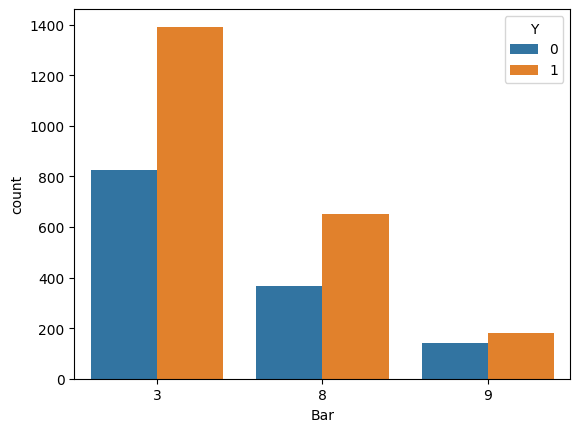

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the observations, drivers older than 21 (we don't have granular data in the 21-25 bracket) who go to the bar more than 1 a month, who travel without kids, in the most majority irrespective of their occupation, are around 60% likely to accept the coupon.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  